# Regressions

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, Lasso, LinearRegression
from scipy.stats import skew
from sklearn import decomposition
import math
from sklearn.preprocessing import normalize

plt.style.use('ggplot')

In [2]:
pd.options.display.max_columns=300 #increase columns shown 

On this step we use the train set to fit severl linear models.

In [3]:
# Load the train set
df = pd.read_csv('./data/new_train_school2.csv')
df.drop(['Unnamed: 0', 'Id'], axis=1, inplace=True)

# Load categorical variables
numerical = pickle.load(open('./tmp/numerical.list', 'rb'))

df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Month,DJREI,Fannie,LaborForce,UnemplRate,Corn,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,CentralAir_Y,PavedDrive_P,PavedDrive_Y,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageQual_Fa,GarageQual_Gd,GarageQual_No,GarageQual_Po,GarageQual_TA,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,BsmtCond_Gd,BsmtCond_No,BsmtCond_Po,BsmtCond_TA,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No,BsmtFinType1_Rec,BsmtFinType1_Unf,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No,FireplaceQu_Po,FireplaceQu_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageFinish_No,GarageFinish_RFn,GarageFinish_Unf,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,LandSlope_Mod,LandSlope_Sev,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,MiscFeature_No,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,GarageCond_Fa,GarageCond_Gd,GarageCond_No,GarageCond_Po,GarageCond_TA,LandContour_HLS,LandContour_Low,LandContour_Lvl,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No,BsmtFinType2_Rec,BsmtFinType2_Unf,Street_Pave,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,School_Fellows,School_High,School_Meeker,School_Middle,School_Mitchell,School_Northwood,School_Sawyer,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No,BsmtQual_TA,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Utilities_NoSeWa,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Nei

## Models fitted to the whole features set

First, we fit linear regression models to the whole dataset.

## Model 1: Linear regression on the whole set

In [4]:
data = df.copy()

# Create sets
X = data.copy().drop('SalePrice', axis=1)
y = np.log(data.copy()['SalePrice'])

X.shape
#(1460, 278)

(1460, 285)

In [5]:
# Load numeric
numerical = pickle.load(open('./tmp/numerical.list', 'rb'))
numerical

['HalfBath',
 'BedroomAbvGr',
 'GarageCars',
 'TotRmsAbvGrd',
 'Month',
 'Corn',
 'GarageArea',
 'MasVnrArea',
 'Fireplaces',
 'EnclosedPorch',
 'OverallCond',
 'LotFrontage',
 '3SsnPorch',
 'LaborForce',
 'GrLivArea',
 'BsmtHalfBath',
 'YearBuilt',
 'KitchenAbvGr',
 'BsmtFinSF2',
 'GarageYrBlt',
 'WoodDeckSF',
 'MoSold',
 'BsmtFullBath',
 '1stFlrSF',
 'YearRemodAdd',
 'DJREI',
 'BsmtUnfSF',
 'Fannie',
 'OpenPorchSF',
 'TotalBsmtSF',
 'OverallQual',
 'LotArea',
 'UnemplRate',
 'FullBath',
 'ScreenPorch',
 'LowQualFinSF',
 'BsmtFinSF1',
 '2ndFlrSF',
 'YrSold',
 'PoolArea',
 'MiscVal']

In [6]:

# Divide the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (1022, 285)
X_test : (438, 285)
y_train : (1022,)
y_test : (438,)


We create helper functions to evaluate results

In [7]:
def rmse_cv(model, X, y):
    '''
    A helper function to calculate the cross validated RMSE
    '''
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring = "neg_mean_squared_error", cv = 10))
    return(rmse)

In [8]:
def rmsle(model, X, y):
    '''
    Calculates rmsle as set by Kaggle
    '''
    return (math.sqrt(np.mean((np.log(np.exp(model.predict(X))) - np.log(np.exp(y))) ** 2)))

### Some Graphs

In [9]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
ridge = Ridge()
lasso = Lasso()
net   = ElasticNet()

In [10]:
features = X
salePrice = y

In [38]:
ridge.set_params(alpha=1.0)
ridge.fit(features, salePrice)
ridge.score(features, salePrice)

0.9432185411530265

In [39]:
coefs = []
intercepts = []
R2  = []
alphaRange = np.linspace(1e-3,200,20)
for alpha in alphaRange:
          ridge.set_params(alpha=alpha)  
          ridge.fit(features, salePrice)
          intercepts.append(ridge.intercept_)
          coefs.append(ridge.coef_)
          R2.append(ridge.score(features, salePrice))

Text(0.5, 1.0, 'Change of Ridge Slopes Varying Alpha')

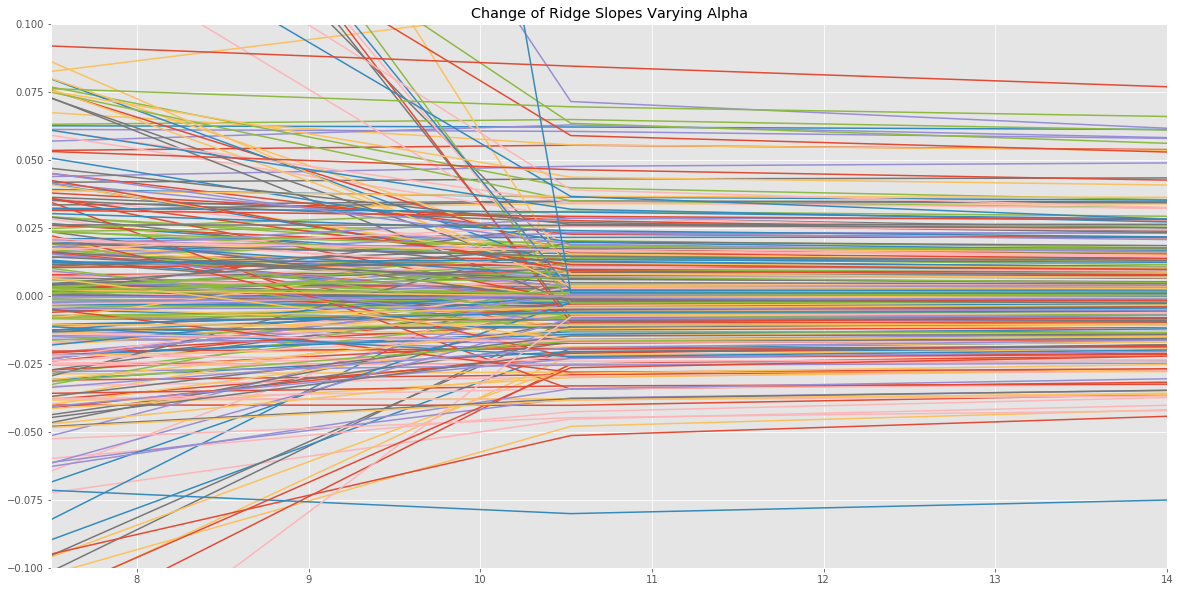

In [44]:
coefs = pd.DataFrame(np.array(coefs), columns=features.columns)
plt.figure(figsize=(20,10))
for name in coefs.columns:
    plt.plot(alphaRange, coefs[name], label=name)
#plt.margins(x=0, y=0)
plt.axis([7.5,14,-.1,.1])
plt.title('Change of Ridge Slopes Varying Alpha')

In [14]:
lasso.set_params(alpha=.1)
lasso.fit(features, salePrice)
lasso.score(features, salePrice)

0.7689651674181944

In [15]:
coefs = []
intercepts = []
R2  = []
alphaRange = np.linspace(1e-3,200,20)
for alpha in alphaRange:
          lasso.set_params(alpha=alpha)  
          lasso.fit(features, salePrice)
          intercepts.append(lasso.intercept_)
          coefs.append(lasso.coef_)
          R2.append(lasso.score(features, salePrice))

Text(0.5, 1.0, 'Change of Lasso Slopes Varying Alpha')

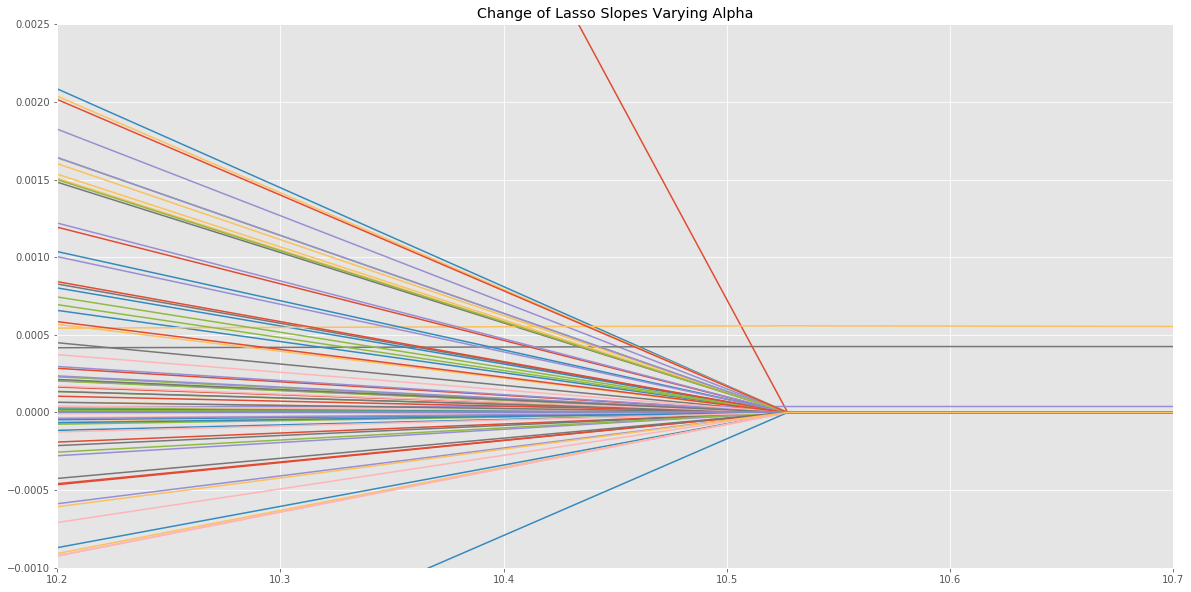

In [16]:
coefs = pd.DataFrame(np.array(coefs), columns=features.columns)
plt.figure(figsize=(20,10))
for name in coefs.columns:
    plt.plot(alphaRange, coefs[name], label=name)   
#plt.margins(x=0, y=0)
plt.axis([10.2,10.7,-.001,0.0025])
plt.title('Change of Lasso Slopes Varying Alpha')

### Model 1a: Ridge regularization

Lowest rmse:  0.1219331821534549
Optimal alpha:  [6.5]


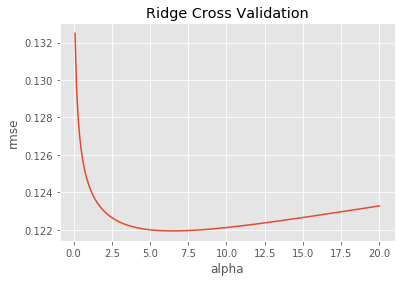

In [17]:
alphas = np.linspace(0.1,20,200)
cv_ridge = [rmse_cv(Ridge(alpha = alpha), X_train,y_train).mean() 
            for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Ridge Cross Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.savefig('./output/ridge_whole.png', dpi=300)

print('Lowest rmse: ',cv_ridge.min())
print('Optimal alpha: ', cv_ridge[cv_ridge==cv_ridge.min()].index.values)

alpha = cv_ridge[cv_ridge==cv_ridge.min()].index.values
#Lowest rmse:  0.12199057098276303
#Optimal alpha:  [6.]

Fit model to the new train dataset and compare with new test.

Model train accuracy (rmsle):  0.09830095038501031
Model test accuracy (rmsle):  0.12135240919891292


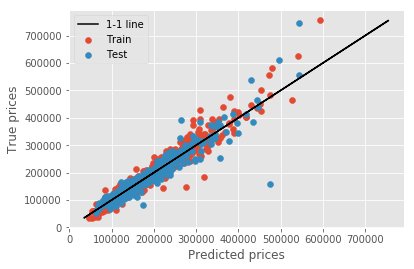

In [18]:
model_tmp = Ridge(alpha=alpha)
model_tmp = model_tmp.fit(X_train,y_train)

print('Model train accuracy (rmsle): ', rmsle(model_tmp, X_train, y_train))
print('Model test accuracy (rmsle): ', rmsle(model_tmp, X_test, y_test))

score1a = rmsle(model_tmp, X_test, y_test)

plt.scatter(np.exp(model_tmp.predict(X_train)), np.exp(y_train), label='Train')
plt.scatter(np.exp(model_tmp.predict(X_test)), np.exp(y_test), label='Test')
plt.plot(np.exp(y), np.exp(y), c='black', label = '1-1 line')
plt.xlabel('Predicted prices')
plt.ylabel('True prices')
_ = plt.legend()
plt.savefig('./output/ridge_whole_true_vs_pred.png', dpi=300)

#Model train accuracy (rmsle):  0.09813793210632009
#Model test accuracy (rmsle):  0.12267773777577652

We train the model on the whole dataset

In [19]:
model1a = Ridge(alpha=alpha)
model1a.fit(X,y)



print('Model accuracy rmsle: ', rmsle(model1a, X, y))
#Model accuracy rmsle:  0.10087939159840285

Model accuracy rmsle:  0.10076130508636325


We plot regression coefficients

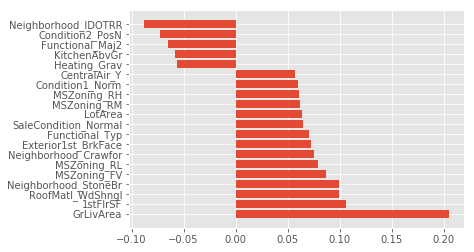

In [20]:
coefs = pd.DataFrame({'Feature':X.columns.values, 'Coefficient':model1a.coef_})

# Plot the most important features
coefs['sort'] = coefs.Coefficient.abs()
coefs = coefs.sort_values('sort', ascending=False).drop('sort', axis=1).head(20).sort_values('Coefficient', ascending=False)
plt.barh(coefs.Feature, coefs.Coefficient)
plt.savefig('./output/ridge_all_top20_coefs.png', dpi=300)

### Model 1b: LASSO regularization 

Alpha : 0.00015000000000000001
Model accuracy train : 0.09121213328347932
Model accuracy test: 0.12338011210743687


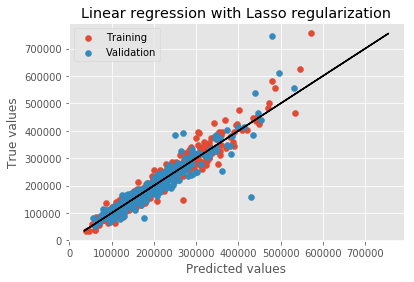

In [21]:
alphas = np.linspace(0.0001,1,20)

lasso = LassoCV(alphas = alphas, 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_


# Narrow down alpha
alphas = alpha * np.linspace(0.5, 1.5, 10)

lasso = LassoCV(alphas = alphas, 
                max_iter = 50000, cv = 10)

# Fit the model
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Alpha :", alpha)

print("Model accuracy train :", rmsle(lasso, X_train, y_train))
print("Model accuracy test:", rmsle(lasso, X_test, y_test))
y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)

score1b =  rmsle(lasso, X_test, y_test)

# Plot predictions
plt.scatter(np.exp(y_train_las), np.exp(y_train), label = "Training")
plt.scatter(np.exp(y_test_las), np.exp(y_test), label = "Validation")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.legend()
plt.plot(np.exp(y), np.exp(y), c = "black")
plt.savefig('./output/lasso_all_true_vs_pred.png', dpi=300)
#Alpha : 0.00015000000000000001
#Model accuracy train : 0.09135509455892457
#Model accuracy test: 0.12380600570953033


In [22]:
model1b = Lasso(alpha=alpha)
model1b.fit(X,y)


print('Model accuracy rmsle: ', rmsle(model1b, X, y))
#Model accuracy rmsle:  0.09829378376324527

Model accuracy rmsle:  0.09813239669030688


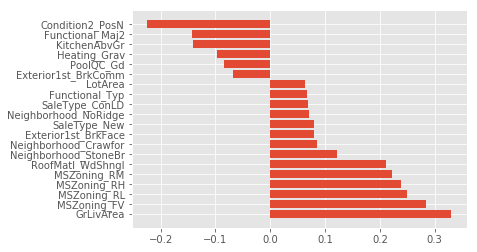

In [23]:
# Plot important coefficients
coefs = pd.DataFrame({'Feature':X.columns.values, 'Coefficient':model1b.coef_})

# Plot the most important features
coefs['sort'] = coefs.Coefficient.abs()
coefs = coefs.sort_values('sort', ascending=False).drop('sort', axis=1).head(20).sort_values('Coefficient', ascending=False)
plt.barh(coefs.Feature, coefs.Coefficient)
plt.savefig('./output/lasso_all_top20_coefs.png', dpi=300)

Train model on the whole dataset.

## Fitting the model on the selected features

The features that were selected in [Trees.ipynb](Trees.ipynb) are used to create regression models

In [24]:
# Load list of variables
select_var = pickle.load(open('./tmp/feaure_list_dt.list', 'rb'))

# Set new X
X_sel = X[select_var].copy()

### Model 2a: Ridge regularization

In [25]:
# Divide the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(X_sel, y, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

#X_train : (1022, 140)
#X_test : (438, 140)
#y_train : (1022,)
#y_test : (438,)


X_train : (1022, 134)
X_test : (438, 134)
y_train : (1022,)
y_test : (438,)


Lowest rmse:  0.12433447649416891
Optimal alpha:  [5.23351759]


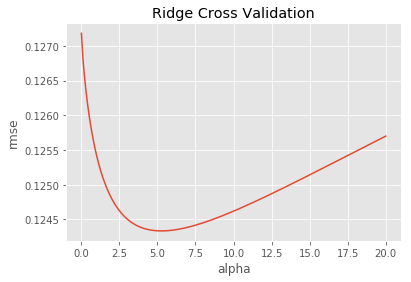

In [26]:

alphas = np.linspace(0.01,20,200)
cv_ridge = [rmse_cv(Ridge(alpha = alpha), X_train,y_train).mean() 
            for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Ridge Cross Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.savefig('./output/ridge_selected.png', dpi=300)

print('Lowest rmse: ',cv_ridge.min())
print('Optimal alpha: ', cv_ridge[cv_ridge==cv_ridge.min()].index.values)

alpha = cv_ridge[cv_ridge==cv_ridge.min()].index.values

#Lowest rmse:  0.12445038322305053
#Optimal alpha:  [6.43894472]

Fit model to the new train dataset and compare with new test.

Model train accuracy (rmsle):  0.10852079583425947
Model test accuracy (rmsle):  0.1220730657586467


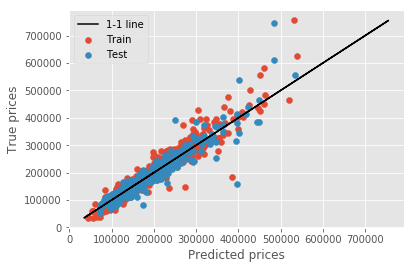

In [27]:
model_tmp = Ridge(alpha=alpha)
model_tmp = model_tmp.fit(X_train,y_train)

print('Model train accuracy (rmsle): ', rmsle(model_tmp, X_train, y_train))
print('Model test accuracy (rmsle): ', rmsle(model_tmp, X_test,y_test))

score2a = rmsle(model_tmp, X_test,y_test)

plt.scatter(np.exp(model_tmp.predict(X_train)), np.exp(y_train), label='Train')
plt.scatter(np.exp(model_tmp.predict(X_test)), np.exp(y_test), label='Test')
plt.plot(np.exp(y), np.exp(y), c='black', label = '1-1 line')
plt.xlabel('Predicted prices')
plt.ylabel('True prices')
_ = plt.legend()
plt.savefig('./output/ridge_selected_true_vs_pred.png', dpi=300)

#Model train accuracy (rmsle):  0.10821007925551773
#Model test accuracy (rmsle):  0.12227957897688707


We train the model on the whole dataset

In [28]:
model2a = Ridge(alpha=alpha)
model2a.fit(X_sel,y)



print('Model accuracy (rmsle): ', rmsle(model2a, X_sel, y))
#Model accuracy (rmsle):  0.1097700940047326

Model accuracy (rmsle):  0.10994315064454253


We plot regression coefficients

<BarContainer object of 20 artists>

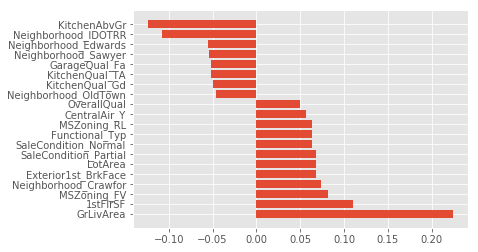

In [29]:
coefs = pd.DataFrame({'Feature':X_sel.columns.values, 'Coefficient':model2a.coef_})

# Plot the most important features
coefs['sort'] = coefs.Coefficient.abs()
coefs = coefs.sort_values('sort', ascending=False).drop('sort', axis=1).head(20).sort_values('Coefficient', ascending=False)
plt.barh(coefs.Feature, coefs.Coefficient)

## Model 2b: LASSO regularization 

Alpha : 0.00015000000000000001
Model accuracy train : 0.10716741916594351
Model accuracy test: 0.12241443153833044


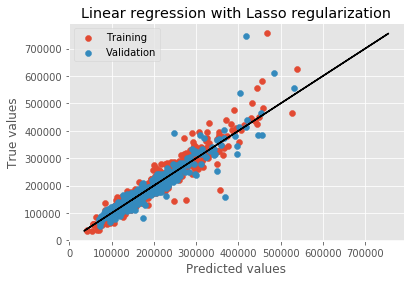

In [30]:
alphas = np.linspace(0.0001,1,20)

lasso = LassoCV(alphas = alphas, 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_


# Narrow down alpha
alphas = alpha * np.linspace(0.5, 1.5, 10)

lasso = LassoCV(alphas = alphas, 
                max_iter = 50000, cv = 10)

# Fit the model
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Alpha :", alpha)

print("Model accuracy train :", rmsle(lasso, X_train, y_train))
print("Model accuracy test:", rmsle(lasso, X_test, y_test))
y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)

score2b =  rmsle(lasso, X_test, y_test)

# Plot predictions
plt.scatter(np.exp(y_train_las), np.exp(y_train), label = "Training")
plt.scatter(np.exp(y_test_las), np.exp(y_test), label = "Validation")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.legend()
plt.plot(np.exp(y), np.exp(y), c = "black")
plt.savefig('./output/lasso_selected_true_vs_pred.png', dpi=300)


#Alpha : 0.00015000000000000001
#Model accuracy train : 0.10630234158931158
#Model accuracy test: 0.12331347620919691

In [31]:
model2b = Lasso(alpha=alpha)
model2b.fit(X_sel,y)



print('Model accuracy (rmsle): ', rmsle(model2b, X_sel, y))
#Model accuracy (rmsle):  0.10920210395898351

Model accuracy (rmsle):  0.1094692831746576


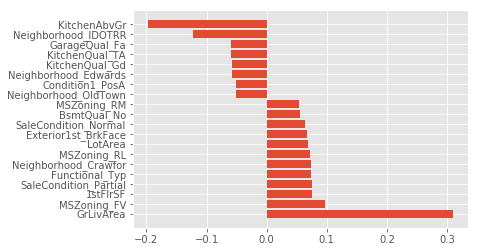

In [32]:
# Plot important coefficients
coefs = pd.DataFrame({'Feature':X_sel.columns.values, 'Coefficient':model2b.coef_})

# Plot the most important features
coefs['sort'] = coefs.Coefficient.abs()
coefs = coefs.sort_values('sort', ascending=False).drop('sort', axis=1).head(20).sort_values('Coefficient', ascending=False)
plt.barh(coefs.Feature, coefs.Coefficient)
plt.savefig('./output/figX.png', dpi=300)
plt.show()


## Combine the models

We combine the models and pickle them for use on the train set

In [33]:
# Models

models = ['model1a', 'model1b', 'model2a', 'model2b']
scores = [score1a, score1b, score2a, score2b]

models_comb = pd.DataFrame({'model':models, 'score': scores})
print(models_comb)

# Pickle
pickle.dump(models_comb, open('./tmp/models_comb', 'wb'))

#previous:
#     model     score
#0  model1a  0.122678
#1  model1b  0.123806
#2  model2a  0.122280
#3  model2b  0.123313

     model     score
0  model1a  0.121352
1  model1b  0.123380
2  model2a  0.122073
3  model2b  0.122414


Pickle models

In [34]:
models_obj = [model1a, model1b, model2a, model2b]

for i, model in enumerate(models_obj):
    name = './tmp/'+models[i]+'.model'
    pickle.dump(model, open(name, 'wb'))
